In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [4]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/3765047152.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [5]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [6]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [7]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.232813,1.343518,1.315351,1.361673,1.331493,1.341344,1.329884,1.269419,1.342435,1.350653,...,1.325863,1.354600,1.330534,1.337788,1.356333,1.308449,-0.093383,0.096867,0.093383,0.430297
1,1.134104,1.278931,1.299488,1.273983,1.344214,1.297609,1.305824,1.286851,1.320812,1.321739,...,1.279261,1.304392,1.278365,1.286166,1.328087,1.319602,-0.171251,0.173747,0.171251,
2,1.738586,42.184541,41.751618,38.853496,42.394165,40.617867,39.681284,41.530642,41.205801,40.160346,...,38.822398,43.048279,40.297200,40.129820,40.290933,42.791819,-38.902181,38.928641,38.902181,
3,2.110506,39.439879,37.843718,40.528516,40.547437,36.861360,40.926871,39.748386,38.224233,33.934671,...,36.181362,41.116112,34.706805,40.812029,39.695747,42.063770,-37.162960,37.216638,37.162960,
4,0.770227,3.347448,2.035372,4.272969,3.206442,2.871498,3.836812,2.071141,1.835139,1.762484,...,3.625393,2.733537,2.653824,2.403882,2.915148,2.239148,-1.975550,2.074261,1.975550,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.280600,59.976735,58.952786,59.831906,60.281275,58.929050,59.097421,61.673218,59.898237,59.475331,...,60.657740,60.265669,60.931889,60.718448,61.159694,61.355779,-57.979100,57.984057,57.979100,
146,0.711949,2.420632,2.750078,2.242593,2.332462,2.654859,2.254077,2.203830,2.195433,2.156147,...,2.700160,2.453953,2.512070,2.326808,1.968595,2.727854,-1.595820,1.620662,1.595820,
147,0.912646,22.811997,18.133532,23.556371,21.361698,22.467006,17.934042,25.534418,20.568441,19.189024,...,19.792546,23.365108,20.240446,23.040010,25.749911,21.394225,-20.892749,21.038276,20.892749,
148,1.041631,13.040811,17.051896,12.069075,12.044262,10.696944,16.435976,11.491336,14.324711,16.492235,...,14.672845,12.491777,17.035037,13.946088,9.344872,13.908674,-11.949712,12.125907,11.949712,


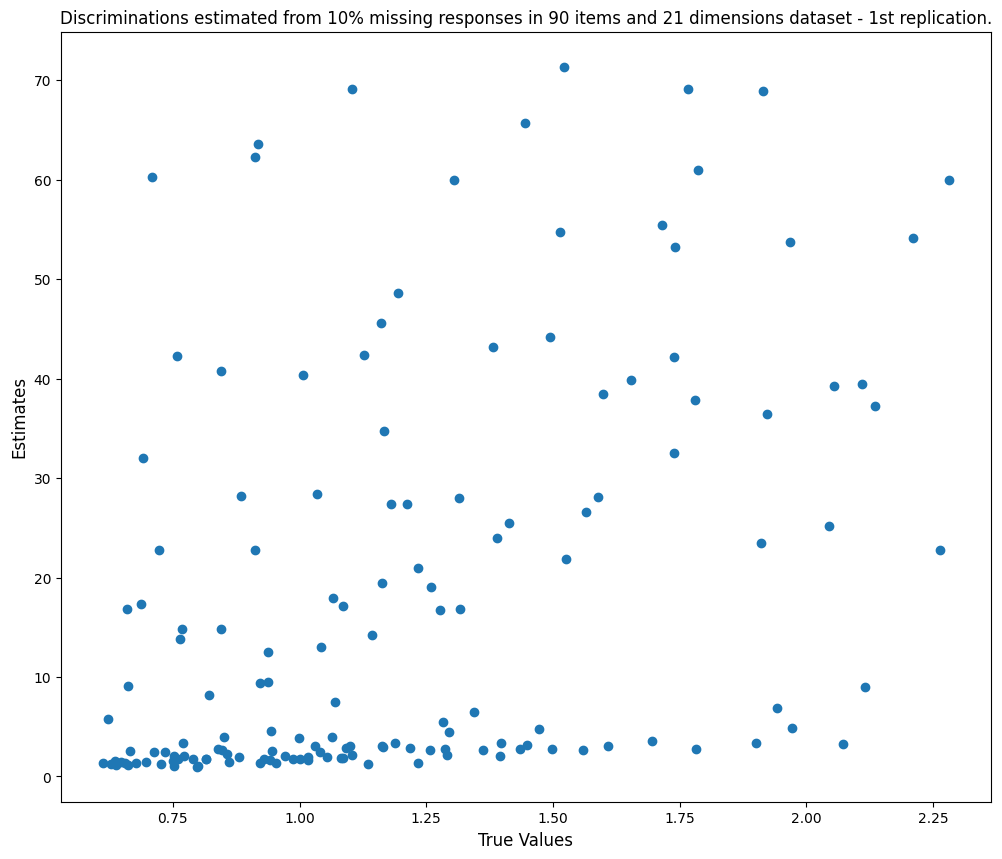

In [24]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 10% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [9]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [10]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/65372075.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [11]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [12]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [13]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.194972,-1.188583,-1.183667,-1.168951,-1.155979,-1.198760,-1.175862,-1.135121,-1.153744,-1.175438,...,-1.167856,-1.192913,-1.162182,-1.136446,-1.147720,-1.165182,-0.028002,0.031327,0.028508,0.784939
1,1.404483,1.344528,1.349133,1.340956,1.358128,1.371205,1.359694,1.375452,1.377449,1.371681,...,1.338005,1.363880,1.368911,1.397623,1.390514,1.383251,0.038550,0.041283,0.038550,
2,-1.196988,-1.182398,-1.160343,-1.223283,-1.253221,-1.169250,-1.235711,-1.184321,-1.211736,-1.192223,...,-1.233106,-1.186087,-1.167479,-1.184236,-1.271791,-1.171136,0.026125,0.046904,0.036377,
3,0.472191,0.635070,0.641339,0.585825,0.595132,0.630476,0.615149,0.615270,0.600604,0.619085,...,0.608717,0.628866,0.642819,0.637699,0.596211,0.653793,-0.143492,0.145340,0.143492,
4,1.783818,1.598196,1.584156,1.565488,1.604945,1.518482,1.584022,1.573121,1.577444,1.652014,...,1.573005,1.679524,1.578360,1.494071,1.547855,1.630145,0.206441,0.209513,0.206441,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.527809,-3.402650,-3.233848,-4.095566,-0.377329,-2.607427,-3.047256,-0.284570,-3.255996,-0.293249,...,-3.333371,-3.080318,-3.041485,-0.274219,-0.374911,-0.495544,2.034690,2.475504,2.034690,
86,-0.749307,-1.774140,-1.545277,-1.798402,-1.594040,-1.728020,-1.525753,-1.508679,-1.516640,-2.574603,...,-1.897701,-1.782432,-1.626266,-1.599487,-1.507597,-1.589941,1.098962,1.159668,1.098962,
87,0.163070,1.305493,1.064261,1.195514,1.200308,1.203739,1.081284,1.399956,1.242498,1.025657,...,1.276852,1.129570,1.218464,1.199974,1.232784,1.152709,-1.053677,1.059671,1.053677,
88,0.928725,1.559827,1.739485,1.550478,1.442741,1.405530,1.771379,1.397243,1.661848,1.655732,...,1.693197,1.558253,1.734954,1.622473,1.236995,1.543747,-0.601101,0.622437,0.601101,


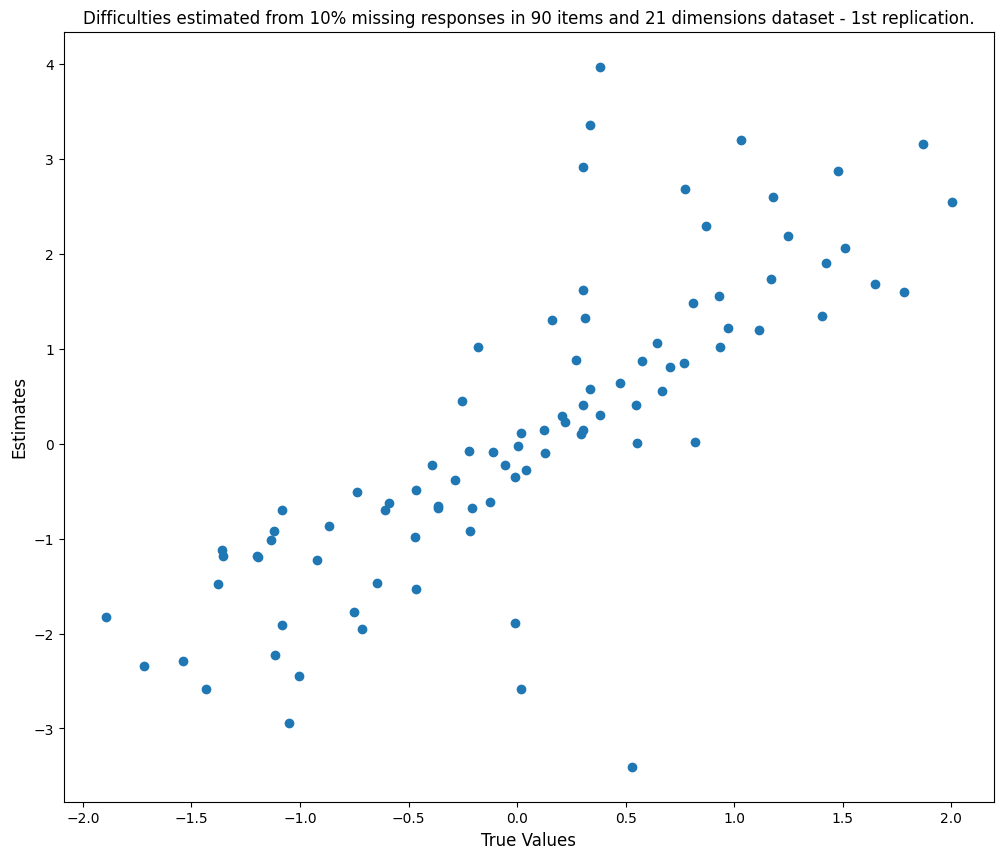

In [25]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 10% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [15]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [17]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [18]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/1073388120.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [19]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [20]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_89084/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [21]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.019225,0.110413,0.020231,0.164580,-0.000595,0.009499,0.184401,-0.194225,0.140047,0.203267,...,0.145478,-0.121236,0.132148,0.058745,0.031063,-0.027396,0.013109,0.207335,0.134953,0.60502
1,-1.773350,-2.109255,-1.091080,-1.224994,-1.102265,-1.024171,-1.078935,-1.346361,-1.009236,-1.304240,...,-1.198927,-1.115406,-1.455127,-1.059173,-0.803459,-1.193835,-0.613609,0.666676,0.625341,
2,-0.012759,0.173229,0.253045,0.177684,0.048830,0.189597,0.249549,0.125662,0.264653,0.131183,...,0.301083,0.152475,0.061396,0.215031,0.085121,0.069057,-0.182260,0.247125,0.185529,
3,0.032244,-0.450993,-0.397277,-0.325062,0.148453,-0.051691,-0.074711,-0.087448,-0.285795,-0.045745,...,-0.100650,-0.068087,-0.186289,-0.114165,-0.053995,-0.891645,0.181883,0.284099,0.193954,
4,-0.712594,-0.300132,-0.579373,-1.070385,-0.459927,-0.443796,-1.349594,-0.313945,-0.314420,-0.778292,...,-0.217621,-0.538212,-0.346491,-0.457201,-0.459139,-0.480293,-0.134567,0.267055,0.234465,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-0.702055,-1.519928,-0.102068,-0.115645,-0.140779,-0.100068,-0.103827,0.833003,0.182393,-0.143598,...,-0.098276,-0.257600,-0.096635,-0.134788,-0.110114,0.129294,-0.578571,0.663861,0.609133,
167996,0.915393,0.050519,0.295840,0.330845,0.339491,0.213825,0.043395,0.041159,0.279137,0.399918,...,0.239634,0.224346,0.232065,0.326696,0.323281,0.121419,0.606001,0.666257,0.622541,
167997,-0.994150,-0.290397,-0.052162,-0.250562,-1.983546,-0.045347,-0.055631,-2.429658,-0.050634,-0.053417,...,-0.044104,-0.045107,-0.048952,-1.706200,-1.885114,-0.046167,-0.771384,0.972283,0.961423,
167998,1.004069,0.871739,0.783266,0.681529,0.843670,0.831630,0.978709,1.886860,1.003937,0.777632,...,0.765119,0.643546,1.846820,1.503262,0.708004,0.828172,0.040142,0.363870,0.296542,


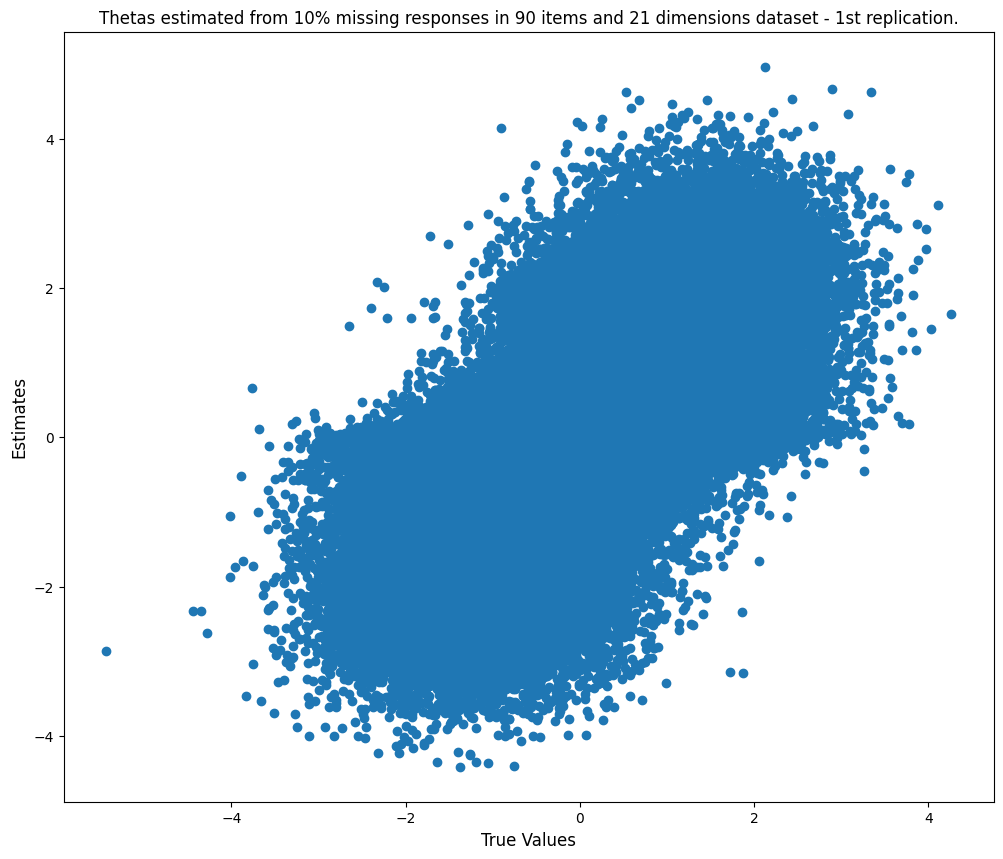

In [26]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 10% missing responses in 90 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [23]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)